Aluno: **Maxuell Lucas de Queiroz de Abreu Cabral**.

Matrícula: **20210037870**.

# **Trabalho 4**
Este trabalho consiste em implementar um módulo com métricas para avaliar os algoritmos.

Classificação:
- matriz_confusão
- acurácia
- macro f1
- f1, precisão e recall por classe
- mcc

Regressão:
- mae
- mse
- rmse
- mape




# **Bibliotecas utilizadas**

- **"import numpy as np"** e **"import pandas as pd"** são convenções comuns ao importar as bibliotecas NumPy e Pandas em Python. Essas convenções tornam o código mais legível e facilitam o uso dessas bibliotecas em seus programas. Dão legibilidade ao código, Evitam conflitos de nomes e redução de digitação.

- **"from sklearn import svm"**  é frequentemente usada ao trabalhar com a biblioteca Scikit-Learn (também conhecida como sklearn). Neste caso, a biblioteca Scikit-Learn fornece um módulo chamado "svm" que contém implementações de algoritmos de Support Vector Machine (SVM) para aprendizado de máquina.  É um método de ensino muito bom para o computador aprender a separar coisas em categorias, categoria de vinho com base nas características químicas.

- **"from sklearn.datasets import sklearn.datasets.load_wine"**:Utilizando um conjunto de dados que é usado para problemas de classificação de vinhos com base em várias características químicas medidas em amostras de vinhos.
Este conjunto de dados é originário da análise química de vinhos cultivados na mesma região na Itália, mas derivados de três variedades diferentes de uva. As características químicas desses vinhos foram medidas, e o objetivo é classificar cada vinho com base nessas medidas.

- **"from sklearn.model_selection import train_test_split"**: Permite dividir um grande conjunto de dados em duas partes distintas: uma que servirá para treinar um modelo de computador e outra para testar a capacidade desse modelo de generalizar seu aprendizado. Essa instrução é essencial para criar conjuntos de treinamento e teste, um passo fundamental no desenvolvimento de modelos de aprendizado de máquina.

- **"import itertools"**: É especialmente útil quando precisamos realizar várias combinações diferentes de elementos ou realizar tarefas que envolvam manipulação de sequências, proporcionando uma variedade de ferramentas para simplificar essas operações.

- **"import matplotlib.pyplot as plt" e "import seaborn as sns"**: Permitem desenhar gráficos que nos ajudam a ver de forma mais clara como nosso computador está se comportando e a entender os resultados por meio de visualizações.

- **"from sklearn import metrics"**: Fornece um conjunto de ferramentas que nos permitem avaliar o desempenho do nosso modelo de aprendizado de máquina. É como ter uma caixa de instrumentos de medição que nos ajuda a entender quão eficaz é o nosso computador em aprender e fazer previsões. Essas ferramentas incluem métricas que medem a precisão, a taxa de acerto e outras estatísticas que nos ajudam a quantificar o desempenho do modelo. Essa linha de código é crucial para avaliar o quão bem nosso modelo está se saindo em tarefas de aprendizado de máquina.

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Com as bibliotecas já importadas, será criado a **Matriz de Confusão** que é uma tabela usada para avaliar o desempenho de um modelo de classificação, comparando as previsões feitas pelo modelo com os valores reais dos dados.
A matriz de confusão tem quatro células principais:

- **Verdadeiro Positivo (TP)**: Isso ocorre quando o modelo prevê corretamente uma classe positiva (classe de interesse) e a verdade é realmente positiva. Em outras palavras, o modelo acertou.

- **Falso Positivo (FP)**: Isso ocorre quando o modelo prevê incorretamente uma classe positiva, mas a verdade é na realidade negativa. É um erro em que o modelo indica a presença da classe de interesse quando não deveria.

- **Verdadeiro Negativo (TN)**: Isso ocorre quando o modelo prevê corretamente uma classe negativa (classe que não é de interesse) e a verdade é realmente negativa.

- **Falso Negativo (FN)**: Isso ocorre quando o modelo prevê incorretamente uma classe negativa, mas a verdade é na realidade positiva. É um erro em que o modelo não detecta a classe de interesse quando deveria.

In [176]:
valores_reais    = [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]
valores_preditos = [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0 ,1 ,1 ,0 ,1 ,0 ,0]

def get_confusion_matrix(reais, preditos, labels):

  # lidar com a validação das entradas de rótulos (labels), reais (reais) e previstos (preditos)
    if len(labels) > 2:
        return None
    if len(reais) != len(preditos):
        return None

    # A primeira classe será a positiva e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    tp = 0  # Verdadeiro positivo correto
    tn = 0  # verdadeiro negativo correto
    fp = 0  # falso positivo incorreto
    fn = 0  # falso negativo incorreto

    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # Determinar se a instância  é da classe positiva
        if v_real == true_class:
          tp += (v_predito == v_real)
          fp += (v_predito != v_real)
        else:
          tn += (v_predito == v_real)
          fn += (v_predito != v_real)

        return np.array([
        [ tp, fp ],# Classe positiva
        [ fn, tn ] # Classe negativa
        ])

conf = metrics.confusion_matrix(valores_reais, valores_preditos, labels=[1,0])
conf

array([[9, 5],
       [6, 8]])

# **Mostrando a tabela de classificação**

Text(0.5, 23.52222222222222, 'Preditivo')

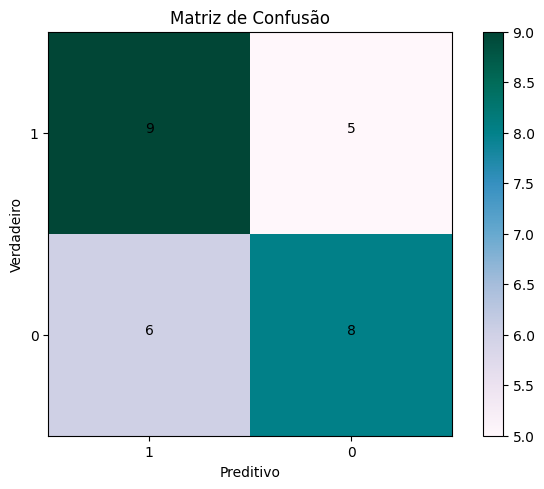

In [177]:
#Definindo classe de interesse
classes = [1, 0]

# Exibir a matriz como uma imagem
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.PuBuGn)
plt.title("Matriz de Confusão")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

#Cor dos número (preta)
fmt = 'd'
thresh = conf.max()

for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Verdadeiro')
plt.xlabel('Preditivo')

In [178]:
TP = true_pos = 9
TN = true_neg = 8
FP = false_pos = 6
FN = false_neg = 5

# Agora utilizando as **métricas de classificação**, serão incluídas no dicionário "resposta".

In [179]:
resposta = {}

# **Precisão**
A precisão(PPV)  avalia a capacidade de um modelo de aprendizado de máquina de classificar corretamente instâncias positivas (ou seja, aquelas que pertencem à classe de interesse) em relação ao total de instâncias classificadas como positivas pelo modelo (tanto corretamente quanto incorretamente).

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

In [180]:
metrica = "Precisão"
resposta[metrica] = (TP) / (TP + FP)
print(f"{metrica} = {resposta[metrica]: .2f}")

Precisão =  0.60


# **Acurácia (ACC)**
 É uma métrica fundamental que mede a proporção de previsões corretas feitas por um modelo em relação ao total de instâncias avaliadas.

 ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [181]:
metrica = "Acurácia"
resposta[metrica] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metrica} = {resposta[metrica]: .2f}")

Acurácia =  0.61


# **Recall**
Mede a proporção de instâncias positivas corretamente identificadas pelo modelo em relação ao total de instâncias reais que são positivas.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

In [182]:
metrica = "Recall"
resposta[metrica] = TP / (TP + FN)
print(f"{metrica} = {resposta[metrica]: .2f}")

Recall =  0.64


#F1 (F-SCORE)
Combina a precisão e o recall de um modelo para fornecer uma única medida de desempenho que equilibra a trade-off entre essas duas métricas.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [183]:
metrica = "F1"
resposta[metrica] = 2 / (1 / resposta["Precisão"] + 1 / resposta["Recall"])
print(f"{metrica} = {resposta[metrica]: .2f}")

F1 =  0.62


# **Macro F1**
É uma extensão da métrica F1-Score para problemas de classificação com mais de duas classes. A macro F1 mede a capacidade geral do modelo de classificar corretamente todas as classes, levando em consideração tanto a precisão quanto o recall em todas as classes. Ela atribui igual importância a todas as classes, o que significa que o desempenho em classes desequilibradas tem o mesmo peso que o desempenho em classes equilibradas.
Uma pontuação de macro F1 mais alta indica um melhor desempenho geral do modelo em todas as classes. É uma métrica útil para avaliar a capacidade do modelo de classificação multiclasse em lidar com várias categorias.

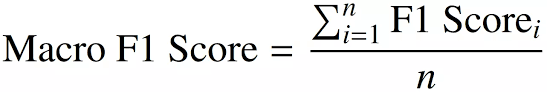

In [184]:
#Exemplo de Lista das classes de F1
f1_scores = [5,2,3,4,1,0,2,3,5]

# Calcular a média dos F1-Scores de todas as classes (macro F1).
macro_f1 = sum(f1_scores) / len(f1_scores)

# Imprima o valor da macro F1.
print(f"Macro F1 = {macro_f1:.2f}")


Macro F1 = 2.78


# **MCC**
É uma métrica útil porque leva em consideração todas as quatro células da matriz de confusão (verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos) e é especialmente útil em conjuntos de dados desequilibrados, onde uma classe tem muitos mais exemplos do que a outra. O MCC tende a ser uma métrica robusta em uma variedade de situações, considerando tanto os acertos quanto os erros de classificação.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)

In [185]:
metrica = "MCC"
x = TP * TN - FP * FN
y = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
resposta[metrica] = x / y
print(f"{metrica} = {resposta[metrica]: .2f}")

MCC =  0.21


Uma observação importante, como podemos ver aqui o nosso MCC resultou em um valor negativo, pois varia entre -1 a 1, e quando há um valor negativo é porque no nosso modelo os falsos positivos e falsos negativos são  mais frequentes do que os verdadeiros positivos e verdadeiros negativos.



# Agora para as **Métricas de Regressão**, serão calculadas e inseridas no dicionário respostaregressao. E utilizarei o vetor de comparação abaixo.

In [186]:
respostaregressao = {}

valores_reais =    [10, 6, 5, 2, 7, 1, 9, 3]
valores_preditos = [10, 6, 4, 1, 7, 0, 7, 3]


# **MAE**
Também chamado de Erro Absoluto Médio , mede o erro médio absoluto entre as previsões do modelo e os valores reais dos dados. Quanto menor o MAE, melhor o modelo está em fazer previsões precisas, pois indica que o erro médio absoluto é menor

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded)

In [187]:
metrica = "MAE"
respostaregressao[metrica] = np.sum(np.abs(np.subtract(valores_reais, valores_preditos)))/len(valores_reais)
print(f"{metrica} = {respostaregressao[metrica]: .2f}")

MAE =  0.62


# **MSE**
Erro Quadrático Médio, mede o erro médio quadrático entre as previsões do modelo e os valores reais dos dados. O MSE tem a vantagem de penalizar erros maiores de forma mais significativa do que erros menores, devido ao termo de quadrado. No entanto, como o MSE está na unidade de medida ao quadrado dos dados originais, não é tão intuitivo quanto o MAE (Mean Absolute Error) para interpretar, pois não está na mesma escala que os dados originais. Portanto, é importante considerar a escala do MSE ao interpretar seus resultados.

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/ae01f23f2ed2814c7db94e1fdc952732f5ca533a)

In [188]:
metrica = "MSE"
x = lambda t: t ** 2
y = np.subtract(valores_reais, valores_preditos)
respostaregressao[metrica] = np.sum(np.array(list(map(x, y))))/len(valores_reais)
print(f"{metrica} = {respostaregressao[metrica]: .2f}")

MSE =  0.88


# **RMSE**
Erro Quadrático Médio da Raiz, ela é derivada do Erro Quadrático Médio (MSE) e é amplamente utilizada para medir a magnitude média dos erros entre as previsões do modelo e os valores reais dos dados. O RMSE mede a raiz quadrada da média dos erros quadrados e, como resultado, tem as mesmas unidades de medida dos dados originais. Portanto, o RMSE é uma métrica mais interpretável em comparação com o MSE, pois está na mesma escala dos dados originais.

![image.png](https://editor.analyticsvidhya.com/uploads/56967RMSE.png)

In [189]:
metrica = "RMSE"
respostaregressao[metrica] = np.sqrt(respostaregressao["MSE"])
print(f"{metrica} = {respostaregressao[metrica]: .2f}")

RMSE =  0.94


# **MAPE**
 Erro Médio Percentual Absoluto é particularmente útil quando se deseja entender a magnitude dos erros de previsão em termos de porcentagem.
 O MAPE é expresso em porcentagem e, portanto, permite que você avalie o erro médio relativo em relação ao tamanho dos valores reais. Quanto menor o MAPE, melhor a precisão das previsões do modelo. No entanto, o MAPE também tem algumas limitações, especialmente quando os valores reais são muito próximos de zero, pois a divisão por zero pode ocorrer, e a métrica pode ser sensível a valores extremos. Portanto, é importante considerar o contexto do problema ao interpretar o MAPE.

 ![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/2a57cc56657c65501b2e1b8f5c38cc77388d10a6)

In [190]:
metrica = "MAPE"
total = 0
for i in range(len(valores_reais)):
    total += abs(valores_reais[i] - valores_preditos[i])/abs(valores_reais[i])
respostaregressao[metrica] = (100 * total)/len(valores_reais)
print(f"{metrica} = {respostaregressao[metrica]: .2f}")

MAPE =  24.03
